<a href="https://colab.research.google.com/github/mrfabien/MLEE_project/blob/main/Europe_winds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Librairies that are useful for this notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix

In [2]:
# Panda version needs to be higher than 1.4.1 to extract the data

pd.__version__
%pip install pandas==1.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Path of the dataset

path_75 = '/content/df_europewinds_75.pkl'
path_95 = '/content/df_europewinds_95.pkl'

In [4]:
data_75 = pd.read_pickle(open(path_75, 'rb'))
data_75.head()

,year,index,bss0_1_mean,bss0_1_std,bss0_6_mean,bss0_6_std,rh1000_850_mean,rh1000_850_std,rh700_500_mean,rh700_500_std,...,lapse_s1_mean,lapse_s1_std,lapse700_500_mean,lapse700_500_std,total_totals_mean,total_totals_std,kindex_mean,kindex_std,cape_mean,cape_std
0,0,0,5.566746,1.409852,20.841965,2.403776,38.471111,5.528201,39.340164,4.507432,...,3.937160,1.835161,7.434533,0.157927,-223.870316,2.545162,-241.414597,1.920714,1.470943e+06,47421.042969
1,0,1,9.117043,2.212430,15.022616,1.769653,91.150574,4.519768,95.393280,3.446400,...,6.827473,0.361492,4.986881,0.123315,-230.567856,1.326195,-256.065704,2.432208,7.463997e+05,29720.560547
2,0,1,3.349157,1.543636,14.397669,1.997612,94.999939,3.762975,96.936325,2.179418,...,7.025648,0.705598,5.416773,0.279987,-229.407089,0.455871,-254.261292,0.960245,7.808471e+05,32203.679688
3,0,1,3.522637,1.343964,6.980061,1.558338,86.109894,6.356337,87.546326,8.126277,...,6.696632,0.315548,6.247573,0.096321,-225.117264,0.556208,-242.131607,0.737710,3.299286e+05,44017.738281
4,0,1,2.906259,1.306351,18.640661,0.778727,76.630363,11.766706,75.178864,5.603858,...,5.132456,0.965875,6.791603,0.163507,-221.258957,0.740583,-236.590332,0.754513,8.468746e+05,69275.562500


In [5]:
data_95 = pd.read_pickle(open(path_95, 'rb'))
data_95.head()

,year,index,bss0_1_mean,bss0_1_std,bss0_6_mean,bss0_6_std,rh1000_850_mean,rh1000_850_std,rh700_500_mean,rh700_500_std,...,lapse_s1_mean,lapse_s1_std,lapse700_500_mean,lapse700_500_std,total_totals_mean,total_totals_std,kindex_mean,kindex_std,cape_mean,cape_std
0,0,0,4.277383,1.872966,8.982351,0.724258,93.492226,5.035859,88.534180,5.347477,...,6.906764,1.327869,6.136250,0.066148,-229.698380,2.886750,-253.835098,3.049098,2.026168e+05,14708.218750
1,0,0,1.802277,0.753601,15.204497,0.530935,59.056320,1.762953,41.138809,20.166151,...,7.818282,0.271740,6.264568,0.162757,-229.545853,2.025261,-257.027924,5.805379,1.180107e+06,50493.390625
2,0,0,0.715803,0.243926,16.503664,0.667165,59.690506,3.856417,24.401155,8.628385,...,7.912159,0.212544,6.037870,0.176981,-230.075562,1.594442,-261.277252,2.990737,1.271284e+06,24269.503906
3,0,0,1.606050,1.158768,18.095135,1.584871,29.221788,1.806868,54.221584,3.082348,...,7.784466,0.688592,8.378917,0.154145,-220.908508,0.992791,-244.325333,1.691479,1.316592e+06,54253.433594
4,0,0,0.307757,0.309118,13.387435,1.153533,29.046917,3.302094,55.367680,3.316934,...,6.988350,0.134230,8.529189,0.123378,-221.513565,0.656967,-246.688919,0.659492,1.148537e+06,25503.769531


In [6]:
# Intensity 1 means extreme convective winds bursts and 0 means moderate convective bursts

data_75['intensity']=0
data_95['intensity']=1

In [7]:
# Merge the 2 dataset and separate the features from the intensity

data_merged = pd.concat((data_75,data_95))
y = data_merged['intensity']
X = data_merged.iloc[:,2:-1]

In [8]:
# Store the name of each feature

features_names = data_merged.columns[2:-1]

In [9]:
# Split the dataset into a training (64%), validation (16%), and testing set (20%)

X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, train_size=0.8)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, train_size=0.8)

In [10]:
# Let's try to predict the 2 classes of winds bursts with Logistic Regression  

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [11]:
# Let's try a prediction

prediction_lr = lr.predict(X_test)

lr_accuracy = accuracy_score(y_test, prediction_lr)  # Feed in the truth and predictions

print(f"LR Model Accuracy: {lr_accuracy:.2%}")

LR Model Accuracy: 58.11%


In [12]:
# The accuracy is not good, less than 60%, so let's try to adujst the solver

lr2 = LogisticRegression(solver="liblinear")
lr2.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [13]:
# Let's try a prediction

prediction2_lr = lr2.predict(X_test)

lr2_accuracy = accuracy_score(y_test, prediction2_lr)  # Feed in the truth and predictions

print(f"LR Model Accuracy: {lr2_accuracy:.2%}")

LR Model Accuracy: 60.50%


In [14]:
# The accuracy is still not good, just above 60%. Let's see the feature importance

print(lr2.coef_)
np.shape(lr2.coef_)

[[ 5.90913708e-03  1.17069735e-03  1.73815862e-04  7.69946832e-04
   9.44865270e-03 -2.11762691e-03  9.42615230e-03 -2.28404345e-04
   6.75636384e-04  3.64516533e-05 -8.89398265e-04 -2.14905366e-04
  -7.08188526e-04  2.71945327e-05  5.66998272e-03  4.98642021e-05
   3.89821865e-03  4.13784127e-05  3.02077277e-07  9.96623235e-07]]


(1, 20)

In [17]:
# Calculation of the standard deviation

std_train = X_train.std(axis=0)

<BarContainer object of 20 artists>

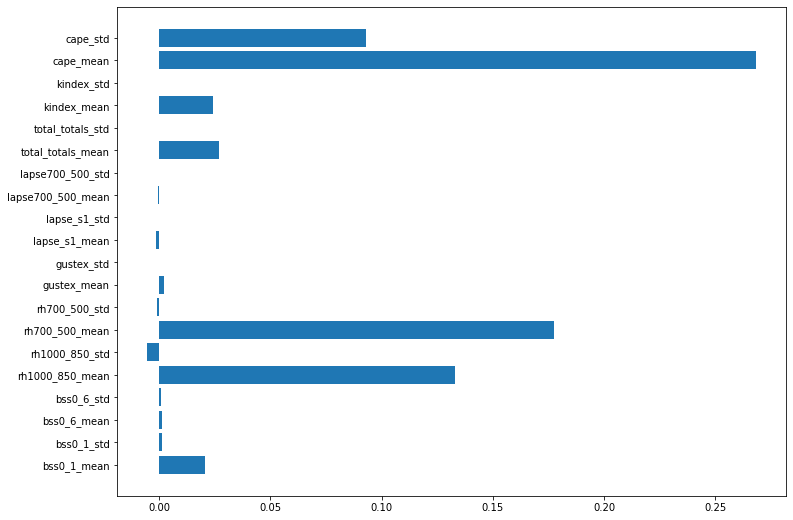

In [16]:
# Graphic of the feature importance

features_importance = std_train*lr2.coef_[0,:]

fig, ax = plt.subplots(1,1, figsize=(12,9))
ax.barh(features_names,features_importance)

In [18]:
# Now let's try with RandomForest

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [19]:
# Let's see if the predictions are better than the Logistic Regression

prediction_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, prediction_rf)  # Feed in the truth and predictions

print(f"RF Model Accuracy: {rf_accuracy:.2%}")

RF Model Accuracy: 66.68%


In [20]:
# Better from the first try, let's try to improve it

rf2 = RandomForestClassifier(n_estimators=400
                                        )
rf2.fit(X_train,y_train)

RandomForestClassifier(n_estimators=400)

In [21]:
# Let's see if the predictions are better than the previous one

prediction_rf2 = rf2.predict(X_test)
rf2_accuracy = accuracy_score(y_test, prediction_rf2)  # Feed in the truth and predictions

print(f"RF Model Accuracy: {rf2_accuracy:.2%}")

RF Model Accuracy: 67.64%


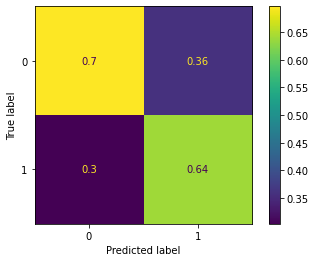

In [22]:
# Results are barely better than the first try with RF, let's see the confusion matrix

cm = confusion_matrix(y_test, prediction_rf2, normalize='pred')
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

In [23]:
# Since the performance are not clearly better than the LR, let's see what features are important for the RF
# The following cell was copied from https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
# This cell mainly extract the importances of each feature and standardized them
# It also check how much time it takes

import time

start_time = time.time()
importances = rf2.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf2.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.338 seconds


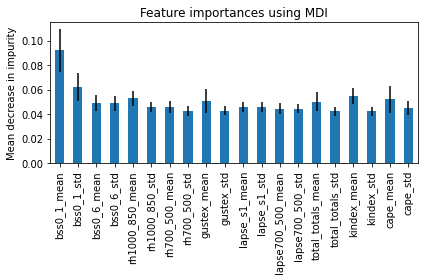

In [24]:
# Let's see the features importance
# This cell was copied also from https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

forest_importances = pd.Series(importances, index=features_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [25]:
# Let's try to permute the features and see how the model refit them
# Again, this was copied from https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=features_names)

Elapsed time to compute the importances: 60.340 seconds


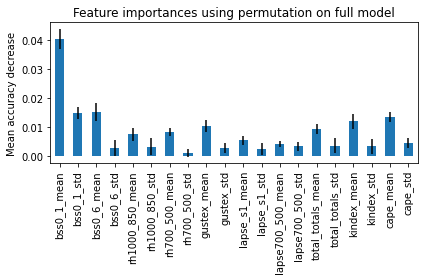

In [26]:
# Let's see the resutls. The higher the bar is, the more important the feature is

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()